Шишка Антон (Варіант 30)

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

1. Завантажити набір даних.

In [ ]:
data = load_breast_cancer()
X = data.data
y = data.target

2. Розділити дані на тренувальний та тестовий набори.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

3. Застосувати SVM і Random Forest для визначення важливих ознак.

In [ ]:
# SVM
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)

svm_coef = svm_model.coef_[0]
svm_feature_selection = SelectFromModel(svm_model, prefit=True)
X_train_svm = svm_feature_selection.transform(X_train)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_feature_importances = rf_model.feature_importances_

4. Побудувати графік або таблицю, щоб показати важливість кожної ознаки в аналізі.

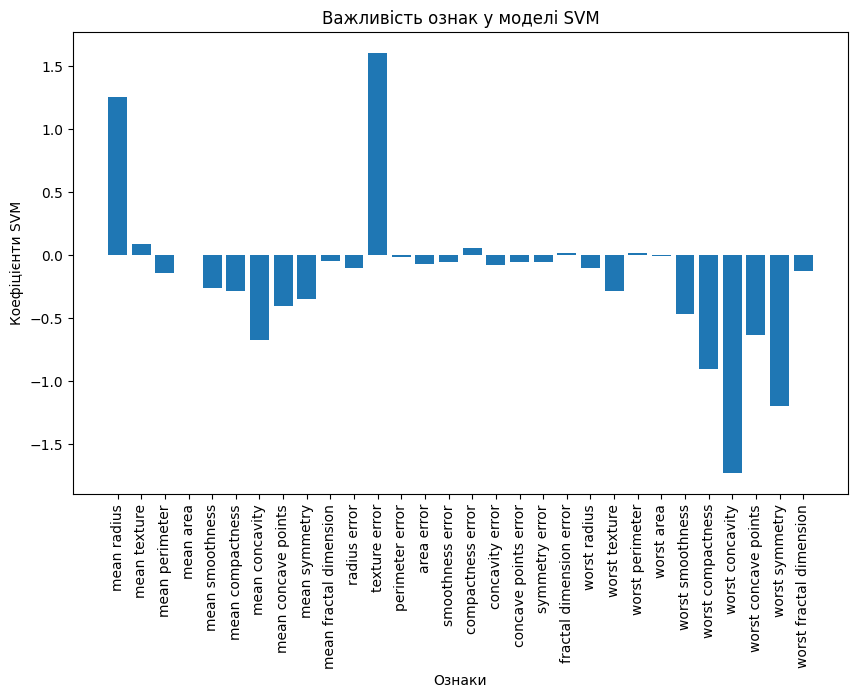

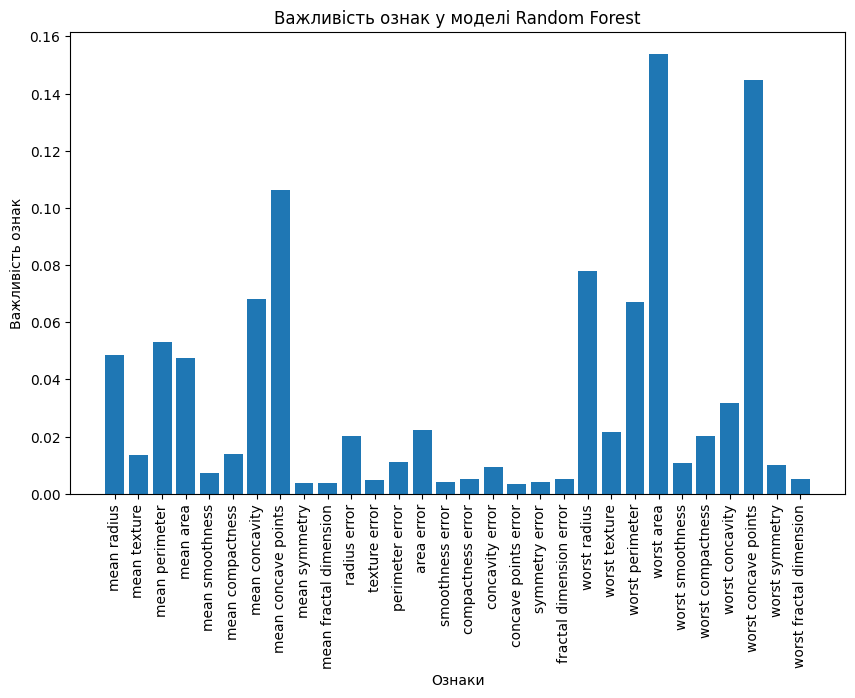

In [ ]:
# SVM
plt.figure(figsize=(10, 6))
plt.bar(range(len(svm_coef)), svm_coef, tick_label=data.feature_names)
plt.xticks(rotation=90)
plt.xlabel('Ознаки')
plt.ylabel('Коефіцієнти SVM')
plt.title('Важливість ознак у моделі SVM')
plt.show()

# Random Forest
plt.figure(figsize=(10, 6))
plt.bar(range(len(rf_feature_importances)), rf_feature_importances, tick_label=data.feature_names)
plt.xticks(rotation=90)
plt.xlabel('Ознаки')
plt.ylabel('Важливість ознак')
plt.title('Важливість ознак у моделі Random Forest')
plt.show()

6. Обчислити точність для двох алгоритмів і порівняти результати

In [ ]:
svm_accuracy = svm_model.score(X_test, y_test)

rf_accuracy = rf_model.score(X_test, y_test)

print(f"Точність моделі SVM: {svm_accuracy:.4f}")
print(f"Точність моделі Random Forest: {rf_accuracy:.4f}")

Точність моделі SVM: 0.9561
Точність моделі Random Forest: 0.9649


**Висновок**

У цій роботі застосовувалися моделі Random Forest та SVM для аналізу даних раку грудей з метою визначення важливих ознак. Графіки важливості ознак вказують на те, що "площа", "радіус" та "периметр" виявилися ключовими факторами для класифікації раку грудей, що може бути корисною інформацією для подальших медичних аналізів та діагностики цієї хвороби.